### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.core.debugger import set_trace
np.random.seed(1234)


#Hepatitis Dataset

     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
     10. LIVER FIRM: no, yes
     11. SPLEEN PALPABLE: no, yes
     12. SPIDERS: no, yes
     13. ASCITES: no, yes
     14. VARICES: no, yes
     15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 (NOTE: ///)
     16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
     17. SGOT: 13, 100, 200, 300, 400, 500, 
     18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
     19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
     20. HISTOLOGY: no, yes

 **NOTE:
BILIRUBIN is continuous attribute, the value can be negative but values can also be used for discreet boundaries dispite being continous accopring to the website

# Messidor Dataset
     0. Image quality assessment: 0,1 -- 0 = bad quality 1 = sufficient quality.
     1. Pre-screening,: 0,1-- 1 = severe retinal abnormality and 0 = lack of abnormality
     2-7. MA detection results: Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5, . . . , 1.0
     8-15. Exudate detection result: Same info as above but for exudate. (*, * * *)
     16. Eucidian distance: from (the center of the) macula to the optic disc (* *, * * *)
     17. Diameter of the optic disc: Real
     18. Result of the AM/FM-based classification: 0,1
     19. Class label: 0,1 1 = contains signs of DR, 0 = no signs of DR.

     * However, as exudates are represented by a set of points rather than the number of pixels constructing the lesions, 
     these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.
     * * Provides important information regarding the patient's condition.
     * * * Normalized with the diameter of the ROI.

### Raw Hepatitis Dataset


In [ ]:
h_col_names = ["Class","Age","Sex","Steroid","Antivirals","Fatigue","Malaise","anorexia","Live Big","Liver Firm","Spleen Palpable","Spiders","Ascites","Varices","Bilirubin","Alk Phosphate","Sgot","Albumin","protime","Histology" ]
#["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]

h_raw_df = pd.read_csv('hepatitis.data', sep=',', header=None, names= h_col_names)
h_raw_df['Class'] = h_raw_df['Class'].replace([1,2],[0,1]) #replace live = 2 and die = 1 with 0 and 1

### Raw Messidor Dataset

In [ ]:
m_col_names = ["Image quality","Pre-screening","a_0.5","a_0.6","a_0.7","a_0.8","a_0.9","a_1.0","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","attr16","attr17","attr18","Class"]
#name columns ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]

m_raw_df = pd.read_csv('messidor_features_only_data.arff', sep=',', header=None, names=m_col_names)
#Class is attribute 19 Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.

In [ ]:
#DESCRIBING DATA 
#no PROTIME = 112 rows
h_df = h_raw_df.drop('protime', axis=1, inplace=False)
h_df = h_df[((h_df != '?').all(axis=1))].astype(float)
#with PROTIME = 80 rows
h_df_2 = h_raw_df[((h_raw_df != '?').all(axis=1))].astype(float)

In [ ]:
print(h_df['Class'].value_counts())
print(h_df_2['Class'].value_counts())
print(h_raw_df['Class'].value_counts())
print(m_raw_df['Class'].value_counts())

1.0    93
0.0    19
Name: Class, dtype: int64
1.0    67
0.0    13
Name: Class, dtype: int64
1    123
0     32
Name: Class, dtype: int64
1    611
0    540
Name: Class, dtype: int64


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
h_df_desc = h_df.describe().drop(["Class","Sex","Steroid","Antivirals","Fatigue","Malaise","anorexia","Live Big","Liver Firm","Spleen Palpable","Spiders","Ascites","Varices","Histology" ], axis=1, inplace=False)
h_df_2_desc = h_df_2.describe().drop(["Class","Sex","Steroid","Antivirals","Fatigue","Malaise","anorexia","Live Big","Liver Firm","Spleen Palpable","Spiders","Ascites","Varices","Histology" ], axis=1, inplace=False)
m_raw_desc =m_raw_df.describe().drop(["Image quality","Pre-screening","attr18","Class"], axis=1, inplace=False)
print(h_df_desc, h_df.shape)
print( h_df_2_desc, h_df_2.shape)
print( m_raw_desc, m_raw_df.shape)

              Age   Bilirubin  Alk Phosphate        Sgot     Albumin
count  112.000000  112.000000     112.000000  112.000000  112.000000
mean    41.196429    1.272321     105.491071   78.616071    3.834821
std     12.150586    0.886252      53.295707   68.761010    0.576368
min      7.000000    0.300000      26.000000   14.000000    2.100000
25%     32.000000    0.700000      72.000000   30.000000    3.500000
50%     39.000000    1.000000      85.000000   56.500000    4.000000
75%     50.000000    1.400000     133.500000   98.000000    4.200000
max     78.000000    4.800000     295.000000  420.000000    5.300000 (112, 19)
            Age  Bilirubin  Alk Phosphate        Sgot    Albumin     protime
count  80.00000  80.000000      80.000000   80.000000  80.000000   80.000000
mean   40.66250   1.221250     102.912500   82.025000   3.843750   62.512500
std    11.28003   0.875213      53.684779   71.599974   0.576292   23.427774
min    20.00000   0.300000      26.000000   14.000000   2.100

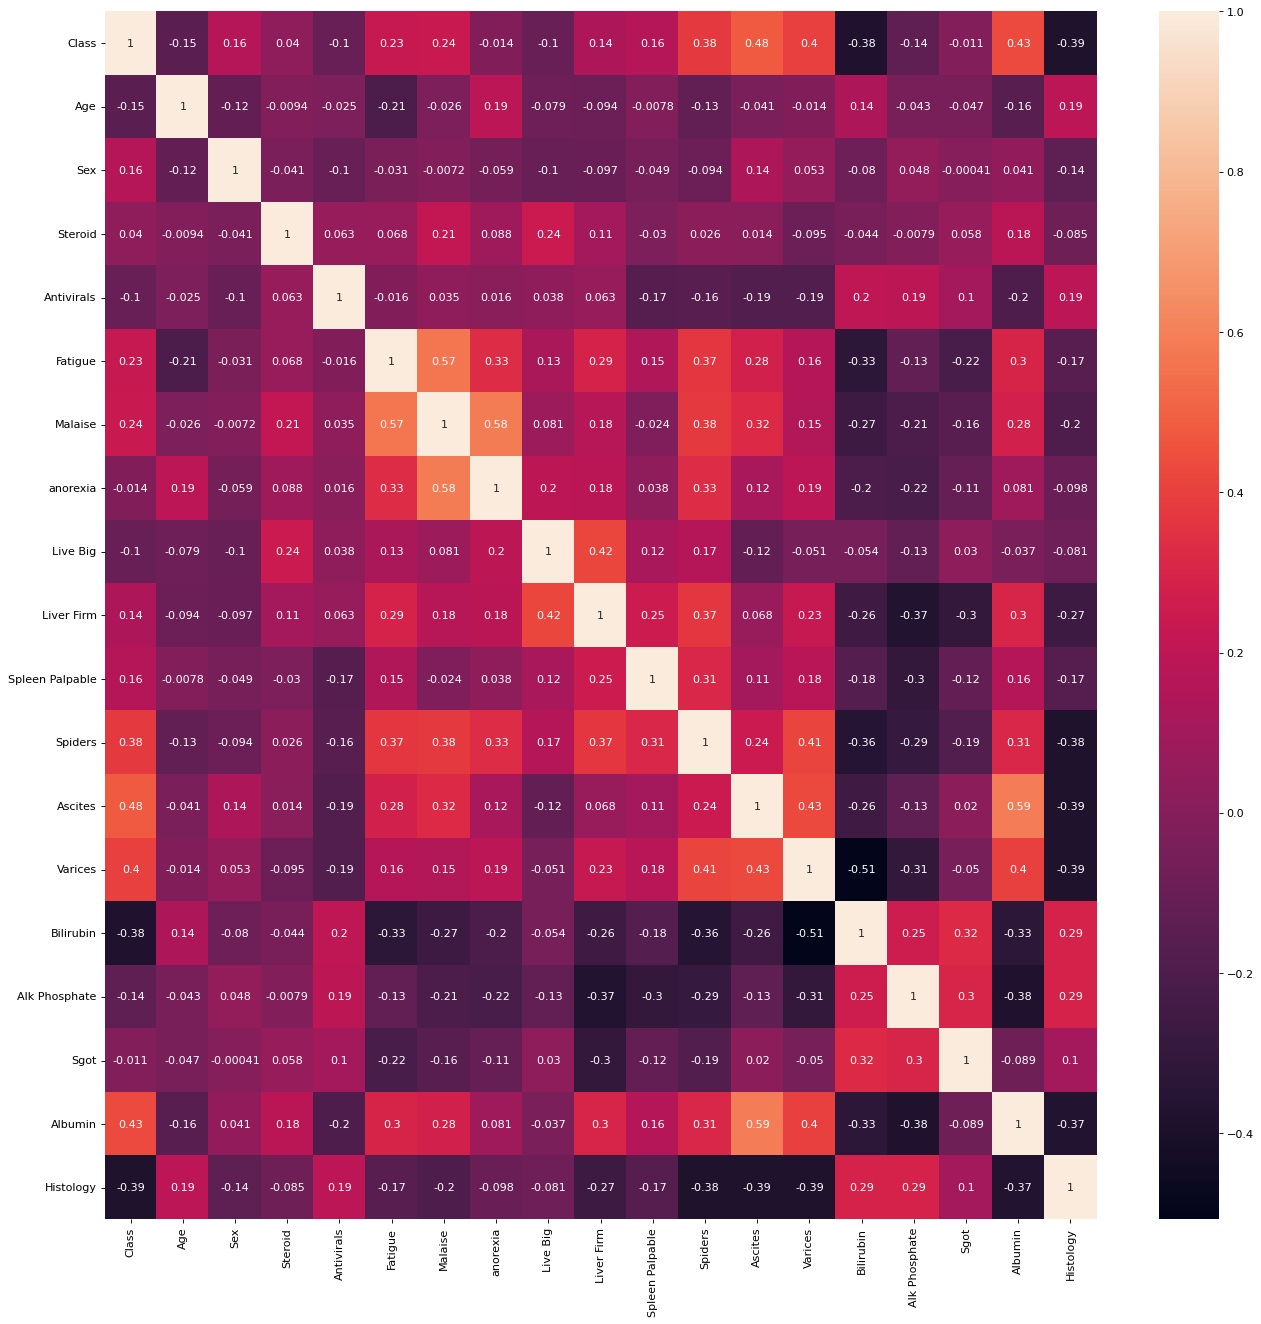

In [ ]:
#no PROTIME = 112 rows
figure(figsize=(20, 20), dpi=80)
sns.heatmap(h_df.corr(), annot = True)

# h_noisyfeatures= ["Bilirubin","Sgot","Fatigue","protime","Liver Firm","anorexia"]

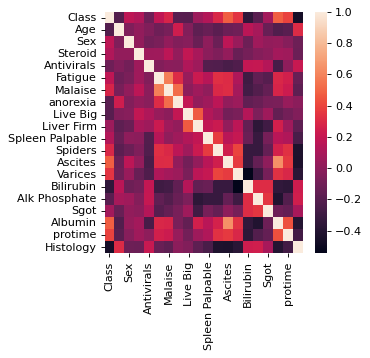

In [ ]:
#with PROTIME = 80 rows
figure(figsize=(4,4), dpi=80)
sns.heatmap(h_df_2.corr())

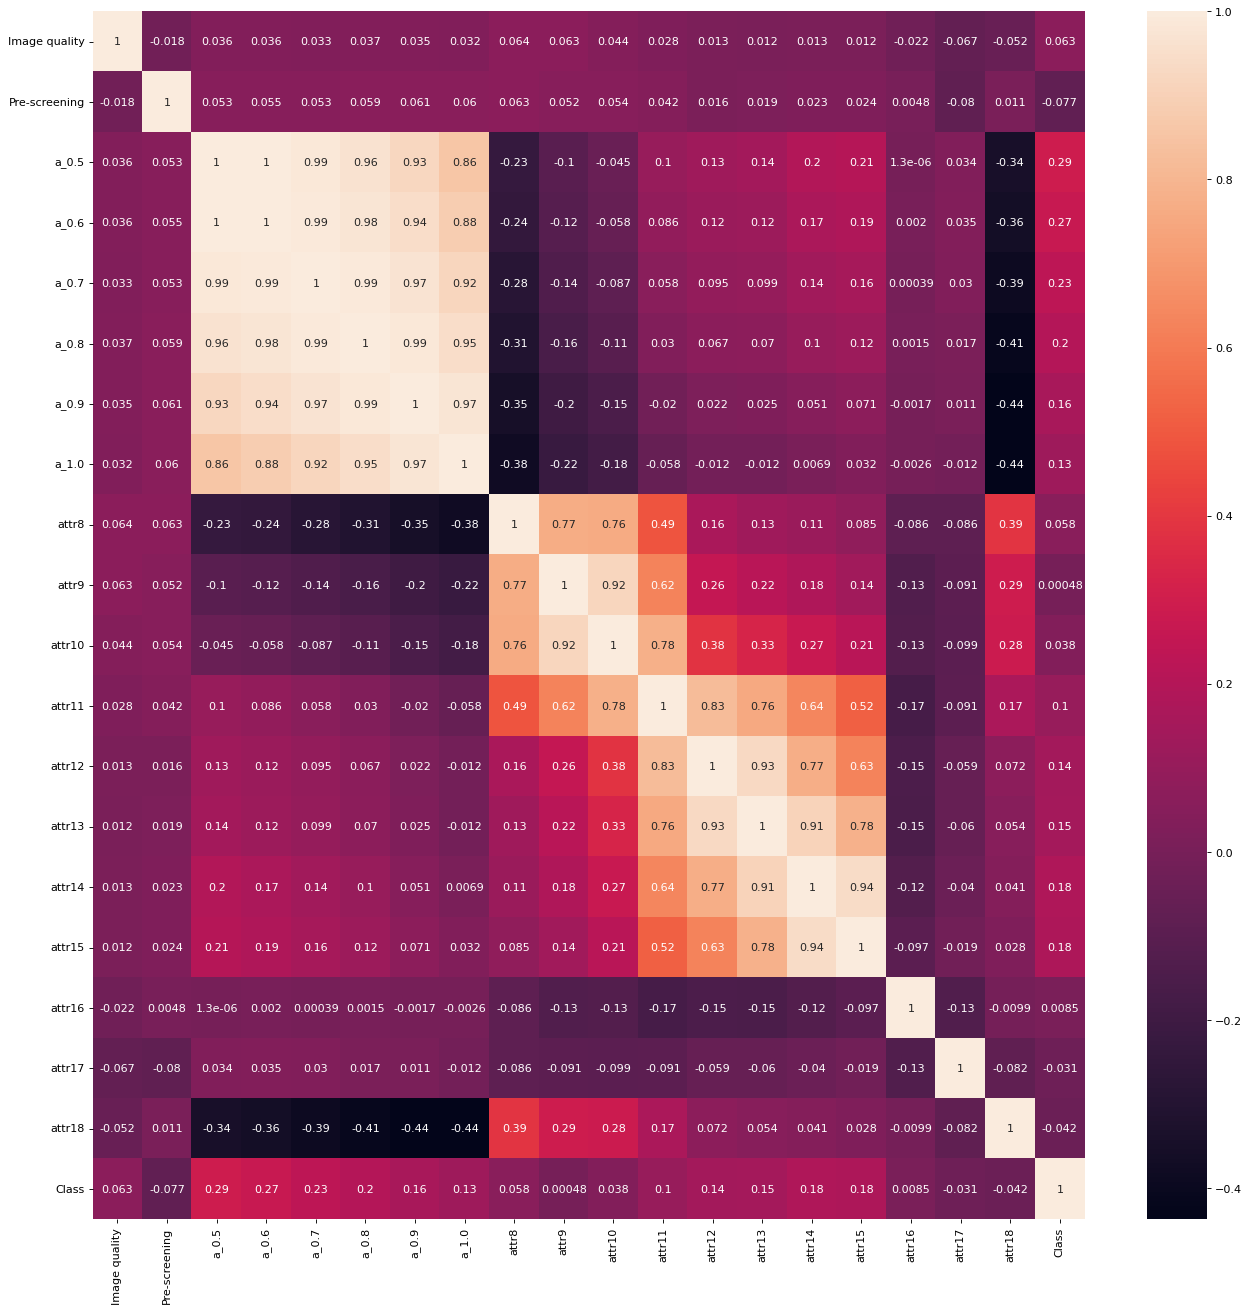

In [ ]:
#with PROTIME = 80 rows
figure(figsize=(20, 20), dpi=80)
sns.heatmap(m_raw_df.corr(), annot = True)

In [ ]:
#l = h_df.columns.values
#non binary columns
def plot_it(data, columns =[], plot_columns=1):
  l = len(columns)
  number_of_columns=plot_columns
  number_of_rows = l-1/number_of_columns
  #boxplot + swarm plot
  plt.figure(figsize=(2*number_of_columns,8*number_of_columns))
  for i in range(0,l):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y = data[columns[i]],color="green")
    sns.swarmplot(y = data[columns[i]], color=".0025", size = 4)
    plt.tight_layout()
  #histogram plot + mean and 1,2 STD
  plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
  for i in range(0,l):
      #plt.subplot(2*number_of_rows + 1,0.5*number_of_columns,i+1)
      #sns.distplot(data[columns[i]],kde=True) 
      plt.subplot(number_of_rows + 1,number_of_columns,i+1)
      sns.histplot(data[columns[i]],kde=True, stat = "probability")
      m = data[columns[i]].mean()
      std = data[columns[i]].std()
      plt.axvline(x= m,color='red')
      plt.axvline(x=m-std, color='red', ls='--', lw=2.5)
      plt.axvline(x=m+std,ls='--', lw=2.5)
      plt.axvline(x= m,color='red')
      plt.axvline(x=m-2*std, color='red', ls='-.', lw=2.5)
      plt.axvline(x=m+2*std,ls='-.', lw=2.5)
    

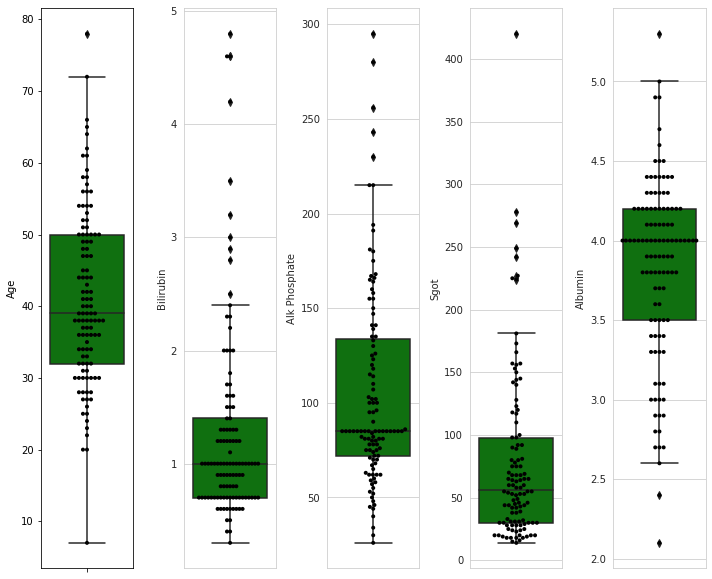

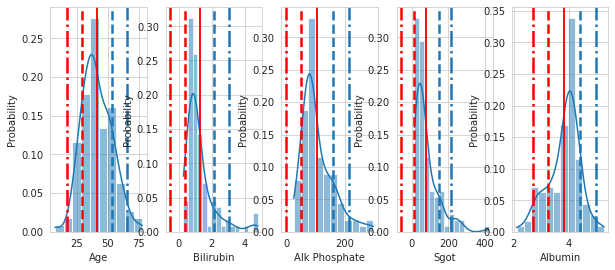

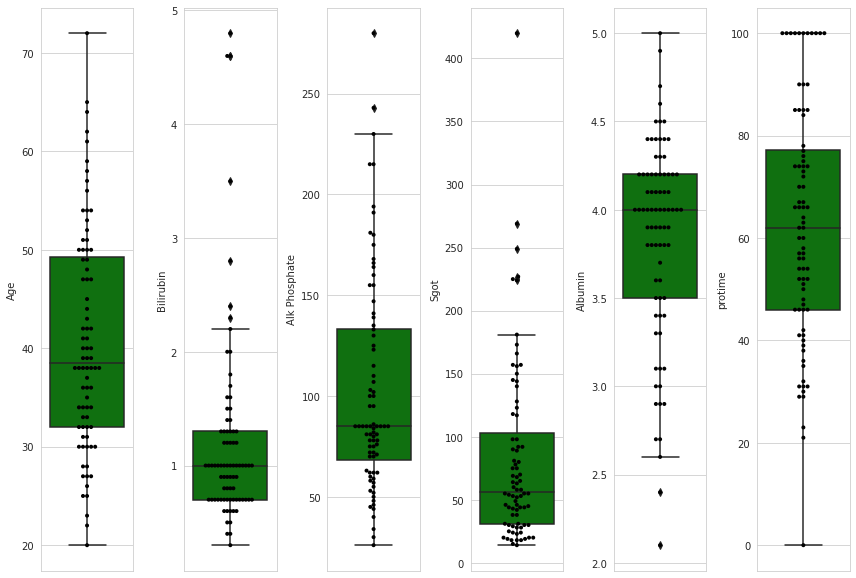

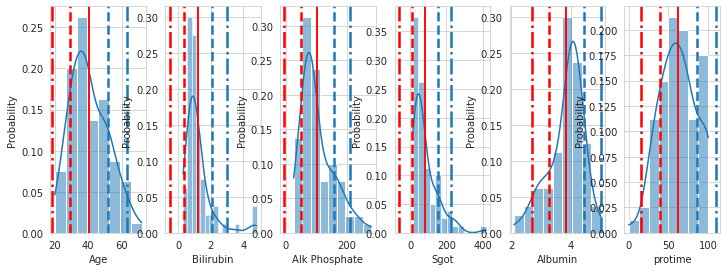

In [ ]:
plot_it(h_df,["Age","Bilirubin","Alk Phosphate","Sgot","Albumin" ], 5 )
plot_it(h_df_2,["Age","Bilirubin","Alk Phosphate","Sgot","Albumin", "protime" ], 6 )
# lk = ["a_0.5","a_0.6","a_0.7","a_0.8","a_0.9","a_1.0","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","attr16","attr17"]
# plot_it(m_raw_df, lk, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.4% of the points cannot be placed; yo

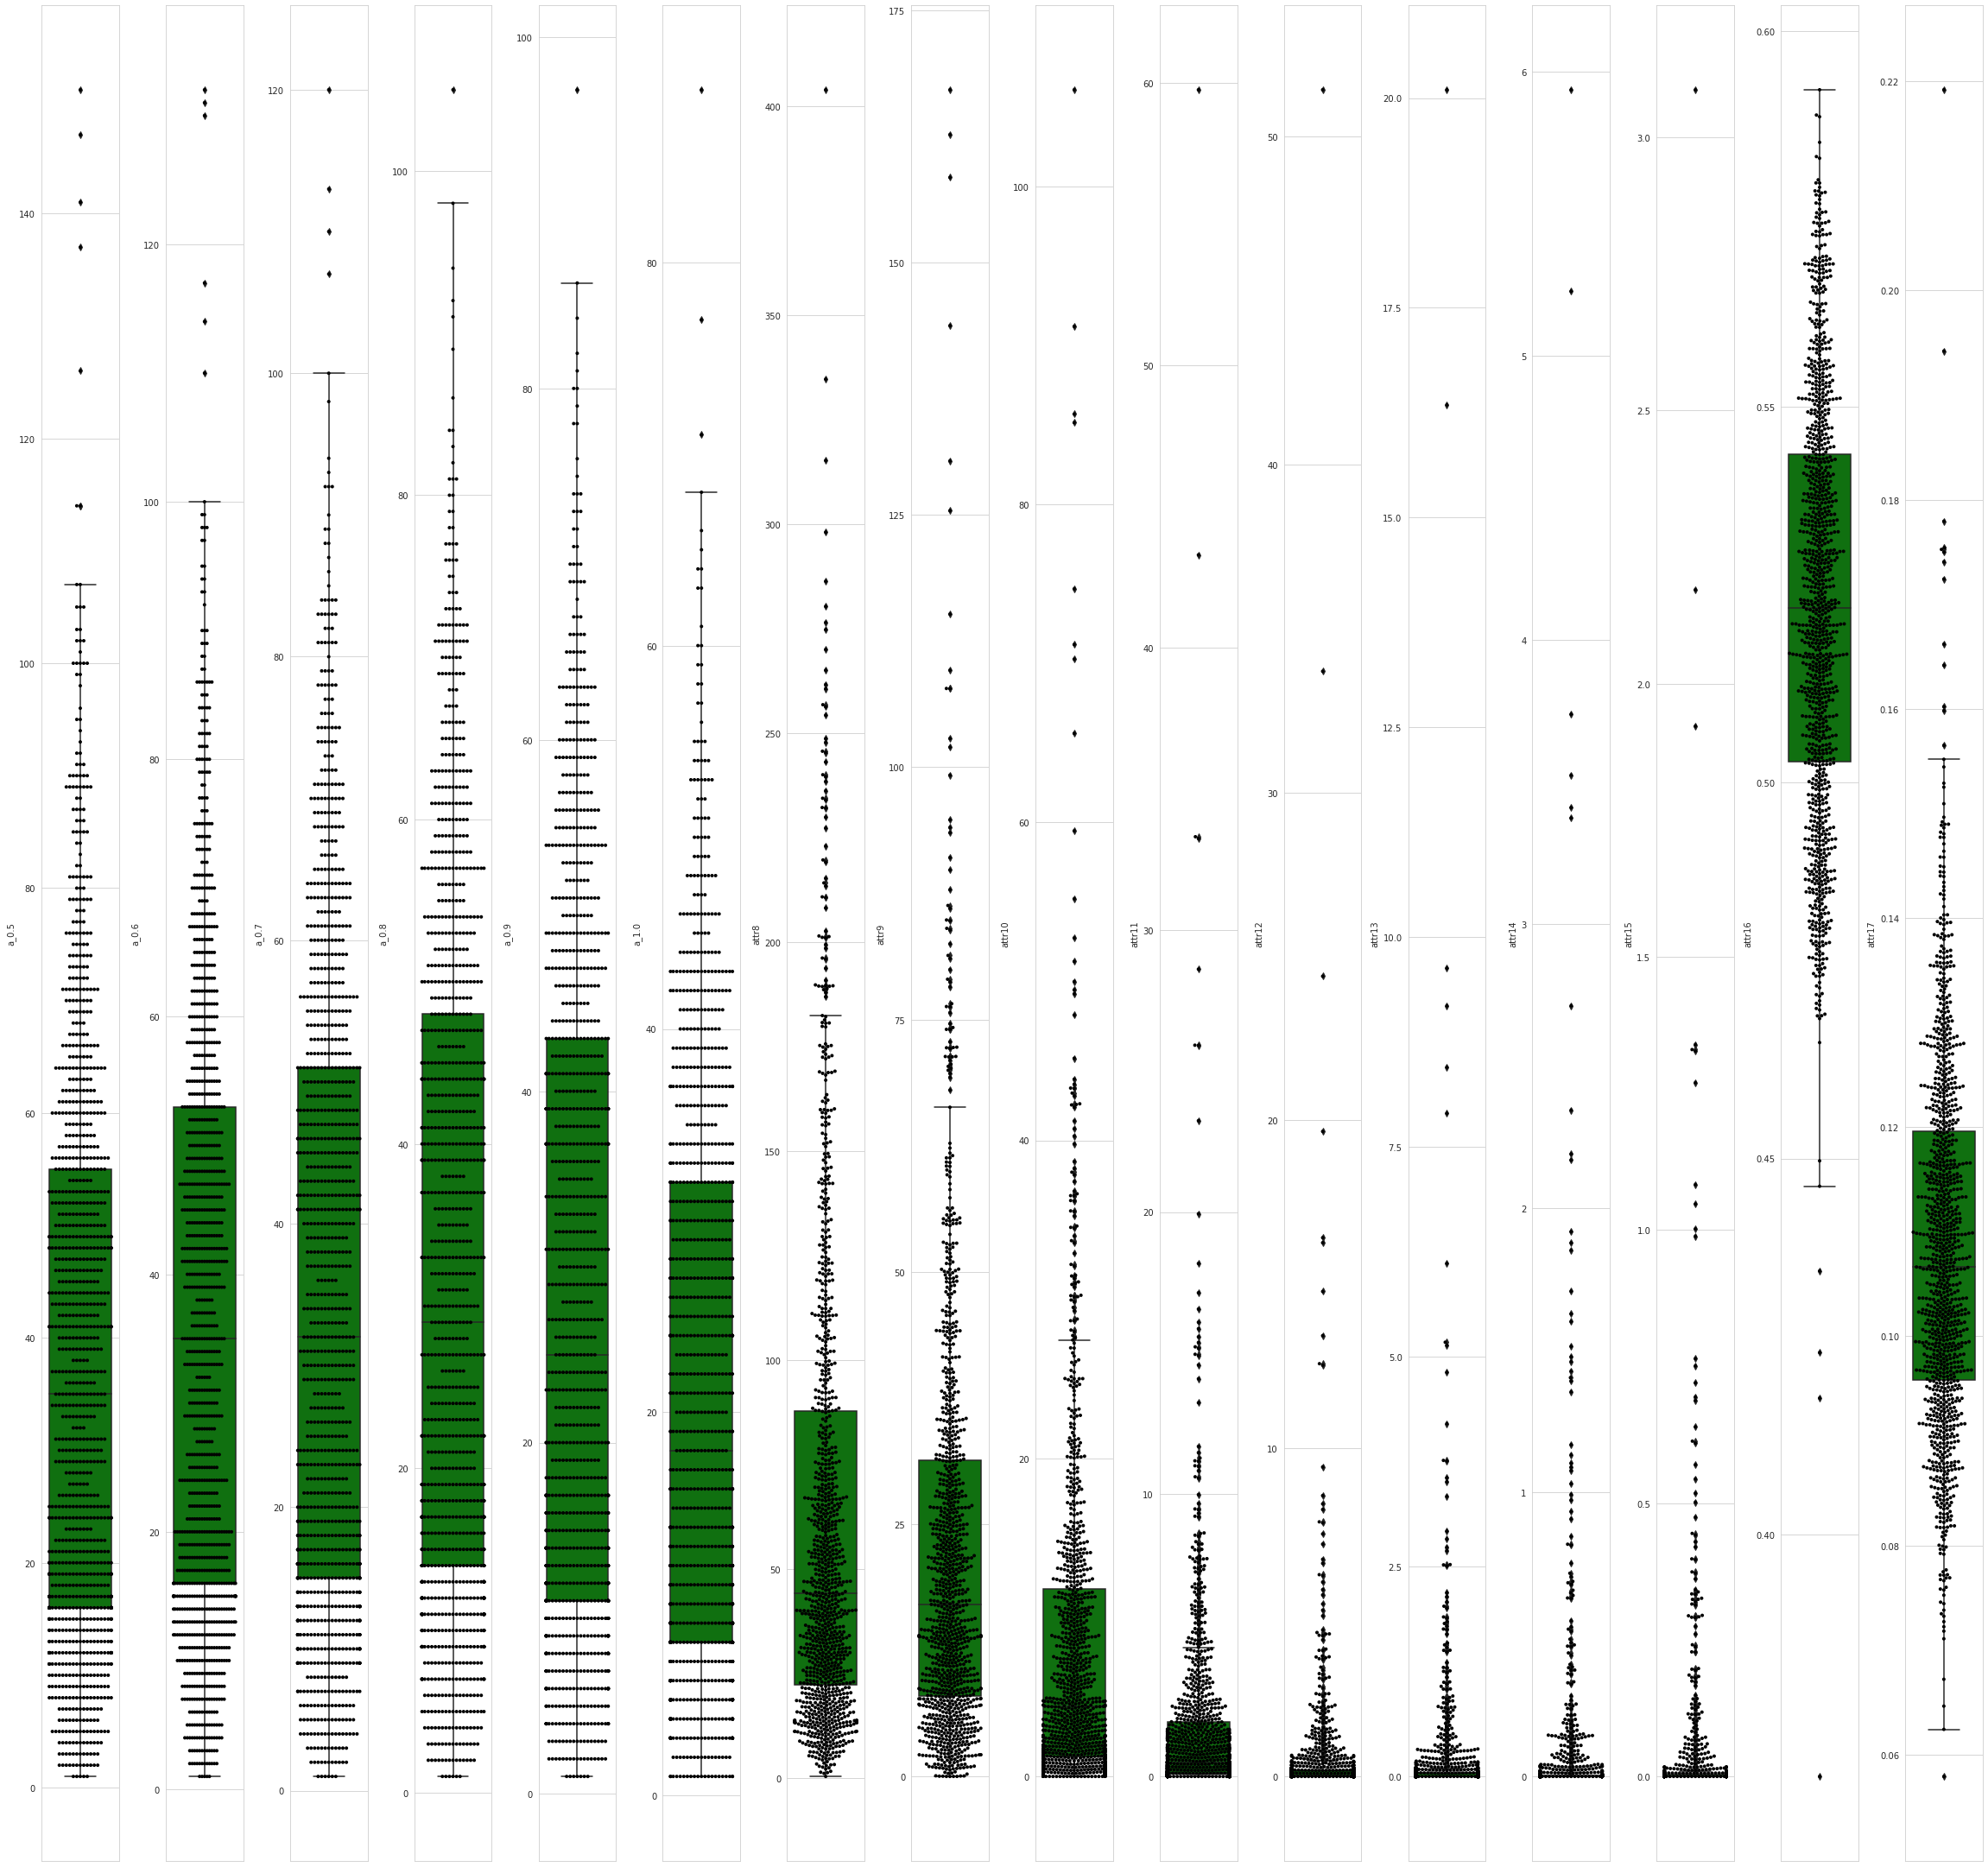

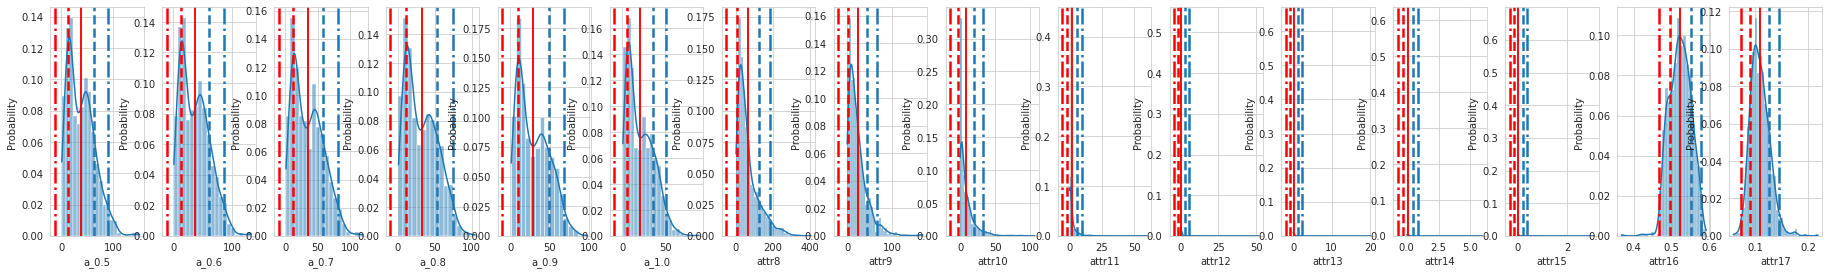

In [ ]:
lk = ["a_0.5","a_0.6","a_0.7","a_0.8","a_0.9","a_1.0","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","attr16","attr17"]
plot_it(m_raw_df, lk, 60)

#DATA CLEANING AND SPLIT

In [ ]:
h_raw_df # raw hepatitis data
m_raw_df # raw mess data

def normalizeData(data):
  for feature in data:
    max_value = data[feature].max()
    min_value = data[feature].min()
    data[feature] = (data[feature]-min_value)/(max_value-min_value)
  return data

# Drops columns (features)
def dropFeatures(data, noisyFeatures):
  data_df = data.drop(noisyFeatures, axis=1, inplace=False)
  return data_df

# Drops all the rows where any feature has a missing value
# Splits X data and Y labels
def drop_split(data, normalize):
  # Removes mv rows
  data_df = data[((data != '?').all(axis=1))]

  # convert it all to float
  data_df = data_df.astype(float)

  # Gets separate X and y
  X_data = data_df.drop('Class', axis=1, inplace=False)
  Y_data = data_df['Class']

  #To normalize or not
  if normalize == True:
    X_data = normalizeData(X_data) 

  # Convert it to numpy
  X_final_data, y_final_data = convert_df_np(X_data,Y_data)
    
  return X_final_data, y_final_data

# Convert dataframe to numpy
def convert_df_np(X_data, y_data):
  y_np_data = y_data.to_numpy().astype(int)
  x_np_data = X_data.to_numpy()
  return x_np_data, y_np_data

# Return the dataset depending if we want noisy features or not
def getData(data, noisyFeatures=None, normalize=False):
  if noisyFeatures == None:
    X_data, y_data = drop_split(data, normalize)
  else:
    data_no_features = dropFeatures(data, noisyFeatures)
    X_data, y_data = drop_split(data_no_features, normalize)
  return X_data, y_data

def getSplitData(data, val=True, train_percent=0.6, test_percent=0.2):
  # if we want validation set
  len_df_X = len(data)
  if val == True:
    val_percent = 1.0 - test_percent
    train, val_set, test = np.split(data, [int(train_percent * len_df_X), int(val_percent * len_df_X)])
    return train, val_set, test
  # If we don't want validation set
  elif val==False:
    # Check that percentage adds up
    if (train_percent + test_percent) != 1.0:
      print("train % and test % not adding to 1")
    else:
      train, test = np.split(data, [int(train_percent * len_df_X)])
      return train, test
  else:
    []

#Stratify function : Returns straified Test, (val and) train dataframes 
def getStratify(data,val=True, train_percent=0.6, test_percent=0.2):
  #My idea was to first split the dataframe in pandas for class 1 and 0, split
  # Assuming we only split into 2 classes one as 0 the other as 1
  class_0 = data.loc[data['Class'] == 0]
  class_1 = data.loc[data['Class'] == 1]
  #the two dataframes into test and train (and val) and\
  if val == True:
    train_0, val_0, test_0 = getSplitData(class_0, val, train_percent, test_percent)
    train_1, val_1, test_1 = getSplitData(class_1, val, train_percent, test_percent)
    #merge shuffle
    train = train_0.append(train_1)
    test = test_0.append(test_1)
    val_set = val_0.append(val_1)
    # return 
    return train, val_set, test
  elif val==False:
    # Check that percentage adds up
    if (train_percent + test_percent) != 1.0:
      print("train % and test % not adding to 1")
    else:
      train_0, test_0 = getSplitData(class_0, val, train_percent, test_percent)
      train_1, test_1 = getSplitData(class_1, val, train_percent, test_percent) 
      #merge shuffle
      train = train_0.append(train_1)
      test = test_0.append(test_1)
      # return 
      return train, test
  else:
    []
  #then merge the classes train and test respectily before splitting into X and Y
  

# Return the split: train, test, (maybe validation)
def getSplitDataXY(data,  normalize=False, rand_seed=1024, noisyFeatures=None, val=True,train_percent=0.6, test_percent=0.2, stratify=True):
  train= []
  test = []
  val_set = []
  #para_for_getStratify = [data,val, train_percent, test_percent, rand_seed]
  if val==True:
    if stratify==True:
       #train, val_set, test = getStratify(*para_for_getStratify)
       train, val_set, test = getStratify(data,val, train_percent, test_percent)
    else:
      train, val_set, test = getSplitData(data,val, train_percent, test_percent)


    train = train.sample(frac=1, random_state = rand_seed)
    val_set = val_set.sample(frac=1, random_state = rand_seed)
    test = test.sample(frac=1, random_state = rand_seed)

    train_X , train_Y = getData(train, noisyFeatures, normalize)
    test_X , test_Y = getData(test, noisyFeatures, normalize)  
    val_X , val_Y = getData(val_set, noisyFeatures, normalize)  
    return train_X , val_X ,  test_X , train_Y,  val_Y, test_Y 
  else:
    if stratify==True:
      train, test = getStratify(data,val, train_percent, test_percent)
    else:
       train, test = getSplitData(data,val,train_percent, test_percent)

    train = train.sample(frac=1, random_state = rand_seed)
    test = test.sample(frac=1, random_state = rand_seed)

    train_X , train_Y = getData(train, noisyFeatures)
    test_X , test_Y = getData(test, noisyFeatures) 
    return train_X , test_X , train_Y, test_Y 
  #then into X and Y (and convert to NUMPY)


# Training and Testing Models 
Data:

Mes Columns 
["Image quality","Pre-screening","a_0.5","a_0.6","a_0.7","a_0.8","a_0.9","a_1.0","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","attr16","attr17","attr18","Class"]

Hep Columns
["Class","Age","Sex","Steroid","Antivirals","Fatigue","Malaise","anorexia","Live Big","Liver Firm",
     "Spleen Palpable","Spiders","Ascites","Varices","Bilirubin","Alk Phosphate","Sgot","Albumin","protime","Histology" ]


In [ ]:
# Raw Data 
m_raw_df
h_raw_df

# noisyFeatures
m_nfeatures =  ["Image quality","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","a_0.9","Pre-screening"]
h_nfeatures = ["Bilirubin","Fatigue","protime","Liver Firm","anorexia","Age", "Histology"]

# KNN MODEL

### Model Implementation

Multiple Distance functions are used to test

In [ ]:
import math
from numpy import dot
from numpy.linalg import norm

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

def cosinesim(x_train, x_test):
  distances = []
  train = x_train[:1:][0]
  test = x_test[1::][0]

  for i, x_prime in enumerate(test):
    d_prime = []
    for j, x in enumerate(train):
      result = dot(x_prime, x)/(norm(x_prime)*norm(x))
      d_prime.append(result)
    distances.append(d_prime)

  return np.array(distances)

euclidean.__name__ = "euclidean"
manhattan.__name__ = "manhattan"

In [ ]:
import numpy as np 
import pandas as pd

# Create the model (fit and predict functions)
class KNN: 

  # Initialise the parameter K and the distance function
  def __init__(self, K=1, distfunc=euclidean):
    self.distfunc = distfunc
    self.K = K
    return

  # The fit function: "Saves" the training data 
  def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train= y_train
    self.numClasses = int(max(y_train) + 1)
    return self

  # Predict the label outputs for input instances (test data) based on training data
  def predict(self, x_test):
    
    num_test_instances = int(x_test.shape[0])
      
    # For each x_test instance, calculate distance to each x_train instance
    all_dist = self.distfunc(self.x_train[None,:,:], x_test[:,None,:])

    # For each x_instance, each column is a class/label 
    # where (i,column) is a probability of that class occuring from k distances
    label_counts = np.zeros((num_test_instances, self.numClasses))

    # Each row is an x_test instance, 
    # Each column is the index of the x_train instances closest to the x_test instance 
    k_nearest = np.zeros((num_test_instances, self.K), dtype=int)

    # Go through every x_test instance
    for i, distances in enumerate(all_dist):

      # Sort the list of distances in ascending order
      asc_dist = np.argsort(distances) 

      # save only the smallest k distances each row and save to k_nearest
      k_nearest[i:] = asc_dist[:self.K]

      # count the number of instances that have each column/label in the k_nearest 
      label_counts[i,:] = np.bincount(self.y_train[k_nearest[i,:]], minlength=self.numClasses)
    
    # Get the probability of each class
    label_prob = label_counts/self.K

    return k_nearest, label_prob


## Training and Testing KNN



### Fine Tuning Parameter K

In [ ]:

# For each distfunction, get the best K from validation set 
def results(data, distfunc, stratify, noisyFeatures, norm):
  
  m_X_train, m_X_val, m_X_test, m_Y_train, m_Y_val, m_Y_test = getSplitDataXY(data,norm, 135, noisyFeatures, True, 0.6,0.2, stratify)
  
  acc = []
  num_instances = len(m_X_train)
  K_values = range(1,50)

  for k in K_values:
    model = KNN(k)
    model.fit(m_X_train, m_Y_train)
    y_predict, y_prob = model.predict(m_X_val)

    #To get hard predictions by choosing the class with the maximum probability
    y_pred = np.argmax(y_prob,axis=-1)
    accuracy = np.sum(y_pred == m_Y_val)/m_Y_val.shape[0]

    acc.append(accuracy)

  # Get the K with the max accuracy
  bestAccuracy = max(acc)
  bestK = np.argmax(acc)+1

  print(f'Best accuracy achieved with validation set is {bestAccuracy*100:.1f} with K value of {bestK}\n')

  # plot the different value of K and accuracy
  plt.plot(K_values,acc)
  plt.ylabel("Accuracy")
  plt.xlabel("K Value")
  plt.show()

  return bestK

# Get the accuracy of the K for a specific distance function
def resultsTest(data, distfunc, K, stratify, noisyFeatures, norm):

  m_X_train, m_X_val, m_X_test, m_Y_train, m_Y_val, m_Y_test = getSplitDataXY(data, norm, 135, noisyFeatures, True, 0.6,0.2, stratify)

  model = KNN(K, distfunc)
  model.fit(m_X_train, m_Y_train)
  y_predict, y_prob = model.predict(m_X_test)

  #To get hard predictions by choosing the class with the maximum probability
  y_pred = np.argmax(y_prob,axis=-1)
  accuracy = np.sum(y_pred == m_Y_test)/m_Y_test.shape[0]

  print(f'Accuracy is {accuracy*100:.1f} with K value of {K}\n')

  #decisionPlot(data, model)



Plots

In [171]:

def missclassification():
  return

def decisionPlot(data, noisyfeatures): 
  
  # convert raw data into numpy 
  x, y = getData(data, noisyfeatures)

  # Get 2 features only 
  #we can make the grid finer by increasing the number of samples from 200 to higher value
  x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
  x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

  #to features values as a mesh  
  x0, x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T

  for k in range(1,4):
    #print(np.shape(x_all))
    model = KNN(k)
    x_train, x_test, y_train, y_test = getSplitDataXY(data, True, 1024, noisyfeatures, False, 0.8,0.2, True)

    #x_train = x_train[:, [0, 1]]
    #x_test = x_test[:, [0, 1]]

    #print(y_train.shape[0])

    y_train_prob = np.zeros((y_train.shape[0], 2))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    
    #to get class probability of all the points in the 2D grid
    _, y_prob_all = model.fit(x_train, y_train).predict(x_all)
    y_pred = np.argmax(y_prob_all,axis=-1)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred, marker='.', alpha=0.01)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()


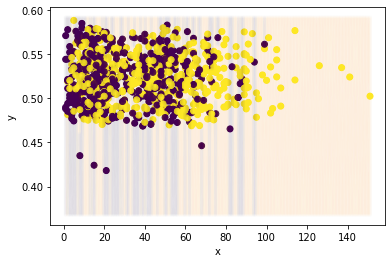

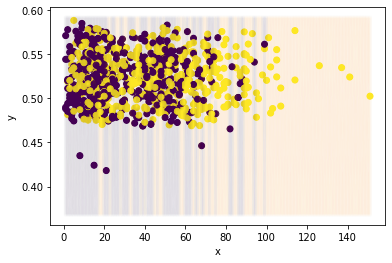

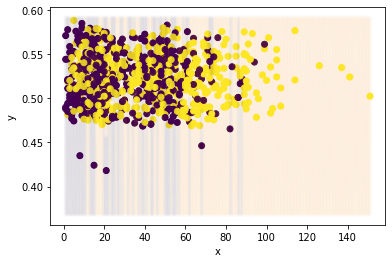

In [172]:
decisionPlot(m_raw_df, ["Image quality","Pre-screening","a_0.6","a_0.7","a_0.8","a_0.9","a_1.0","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","attr17","attr18"])#DRD x_axis=a_0.5, y_axis=attr16

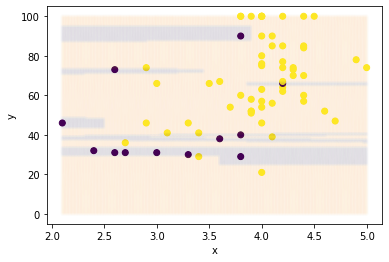

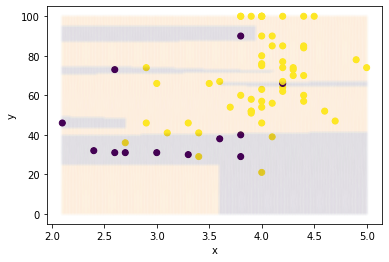

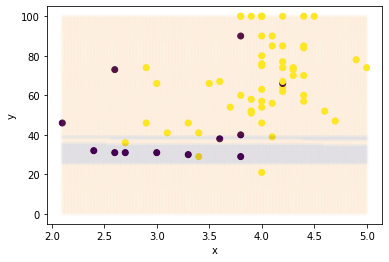

In [173]:
decisionPlot(h_raw_df, ['Ascites',"Bilirubin","Sex","Age","Steroid","Antivirals","Fatigue","Malaise","anorexia","Live Big","Liver Firm","Spleen Palpable","Spiders","Varices","Alk Phosphate","Sgot","Histology"] )#Hepatitis x_axis=ablumin y_axis=protime

### MESSIDOR DATA 

### Non-Stratify Data
#### Get the Accuracy of Test Set from the best K founded by using validation set, for each distance function

NON STRATIFY DATA
Using distance: euclidean
Best accuracy achieved with validation set is 59.1 with K value of 9



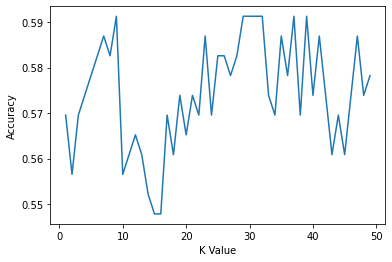

Accuracy is 63.6 with K value of 9

Using distance: manhattan
Best accuracy achieved with validation set is 59.1 with K value of 9



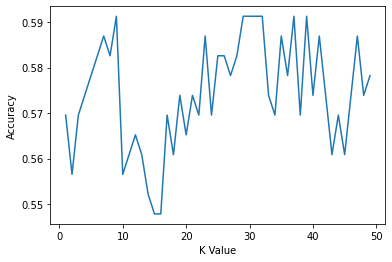

Accuracy is 65.4 with K value of 9

Using distance: cosinesim
Best accuracy achieved with validation set is 59.1 with K value of 9



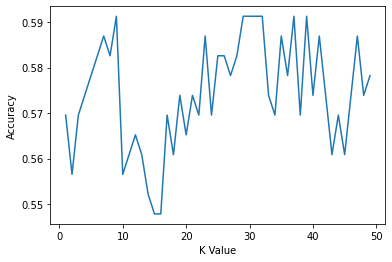

Accuracy is 50.2 with K value of 9



In [ ]:
print("NON STRATIFY DATA")
dist = [euclidean,manhattan,cosinesim]

for d in dist:
  print(f"Using distance: {d.__name__}")
  k = results(m_raw_df, d, False, m_nfeatures, True)
  resultsTest(m_raw_df, d, k, False, m_nfeatures, True)

### Stratify Data
#### Get the Accuracy of Test Set from the best K founded by using validation set, for each distance function#### 

STRATIFY DATA
Using distance: euclidean
Best accuracy achieved with validation set is 61.7 with K value of 41



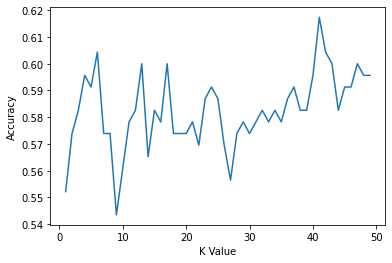

Accuracy is 59.3 with K value of 41

Using distance: manhattan
Best accuracy achieved with validation set is 61.7 with K value of 41



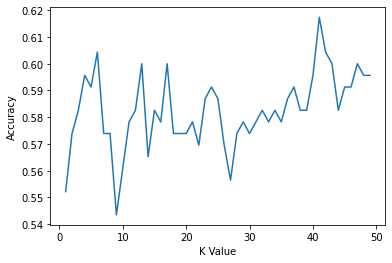

Accuracy is 61.5 with K value of 41

Using distance: cosinesim
Best accuracy achieved with validation set is 61.7 with K value of 41



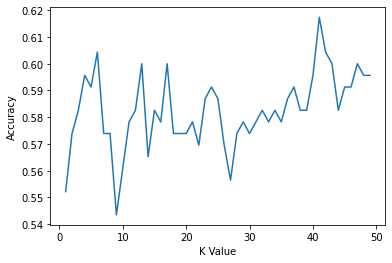

Accuracy is 46.8 with K value of 41



In [ ]:
print("STRATIFY DATA")
for d in dist:
  print(f"Using distance: {d.__name__}")
  k = results(m_raw_df, d, True, m_nfeatures, True)
  resultsTest(m_raw_df, d, k, True, m_nfeatures, True)

### HEPATITIS DATA 

### Non-Stratify Data
#### Get the Accuracy of Test Set from the best K founded by using validation set, for each distance function

In [ ]:

print("NON STRATIFY DATA")
for d in dist:
  print(f"Using distance: {d.__name__}")
  k = results(h_raw_df, d, False, h_nfeatures, True)
  resultsTest(h_raw_df, d, k, False, h_nfeatures, True)

### Stratify Data
#### Get the Accuracy of Test Set from the best K founded by using validation set, for each distance function#### 

STRATIFY DATA
Using distance: euclidean
Best accuracy achieved with validation set is 85.7 with K value of 5



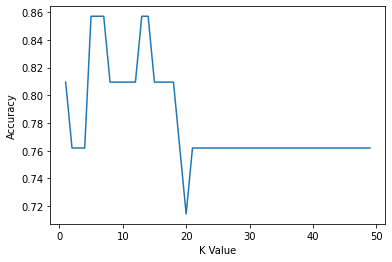

Accuracy is 86.4 with K value of 5

Using distance: manhattan
Best accuracy achieved with validation set is 85.7 with K value of 5



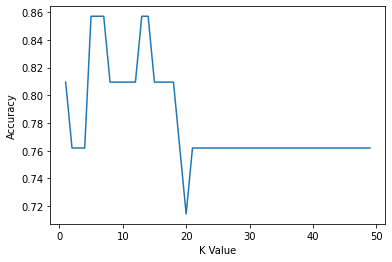

Accuracy is 86.4 with K value of 5



In [ ]:
print("STRATIFY DATA")

for d in dist:
  print(f"Using distance: {d.__name__}")
  k = results(h_raw_df, d, True, h_noisyfeatures, True)
  resultsTest(h_raw_df, d, k, True, h_noisyfeatures, True)

# Decision Tree


##Model Implementation

The Node class

In [ ]:
#The Node class
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices=data_indices
        self.left=None
        self.right=None
        self.feature=None #split feature
        self.value=None #split value
        if parent:
            self.depth=parent.depth+1
            self.num_classes=parent.num_classes
            self.data=parent.data
            self.labels=parent.labels
            classify_prob=np.bincount(self.labels[data_indices],minlength=self.num_classes)
            self.classify_prob=classify_prob/np.sum(classify_prob)

Cost function: 
misclassfication/ entropy/ Gini/ MSE


In [ ]:
#Cost function
def misclassification(labels):
    prop=np.bincount(labels)/len(labels)
    return 1-np.max(prop)

def entropy(labels):
    prop=np.bincount(labels)/len(labels)
    prop=prop[prop>0]
    return -np.sum(prop*np.log(prop))

def gini(labels):
    prop=np.bincount(labels)/len(labels)
    return 1-np.sum(np.square(prop))

def mse(labels):
    mean=np.mean(labels)
    return (np.sum(np.square((labels-mean))))/len(labels)

Decision Tree Class

In [ ]:
#Decision Tree
class Decision_Tree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      
        self.root = None                
        self.cost_fn = cost_fn         
        self.num_classes = num_classes  
        self.min_leaf_instances = min_leaf_instances 
        
    def fit(self, data, labels):
        pass                            
    
    def predict(self, data_test):
        pass

Fit function

In [ ]:
#Fit tree
def fit(self,data,labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    self.fit_tree(self.root)
    return self

def fit_tree(self,node):
    #check if worth spliting
    if node.depth==self.max_depth or len(node.data_indices)<=self.min_leaf_instances:
        return 
    cost,feature, value=greedy_test(node,self.cost_fn)
    if np.isinf(cost):
        return 
    test=node.data[node.data_indices,feature]<= value
    node.feature=feature
    node.value=value
    node_left = Node(node.data_indices[test], node)
    node_right = Node(node.data_indices[np.logical_not(test)], node)
    self.fit_tree(node_left)
    self.fit_tree(node_right)
    node.left=node_left
    node.right=node_right

Decision_Tree.fit = fit
Decision_Tree.fit_tree = fit_tree

Greedy Test

In [ ]:
#Greedy Test
def greedy_test(node, cost_fn):
    best_cost=np.inf
    best_feature,best_value=None,None
    num_instances,num_features=node.data.shape
    data_sorted=np.sort(node.data[node.data_indices],axis=0)
    test_candidates=(data_sorted[1:]+data_sorted[:-1])/2
    for f in range(num_features):
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            left_id = node.data_indices[data_f <= test]
            right_id = node.data_indices[data_f > test]
            if len(left_id) == 0 or len(right_id) == 0:                
                continue
            left_cost = cost_fn(node.labels[left_id])
            right_cost = cost_fn(node.labels[right_id])
            num_left, num_right = left_id.shape[0], right_id.shape[0]
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

Predict function


In [ ]:
#Predict
def predict(self,test_data):
    classify_prob = np.zeros((test_data.shape[0], self.num_classes))
    for n, x in enumerate(test_data):
        node = self.root
        while node.left:
            if x[node.feature] <= node.value:
                node = node.left
            else:
                node = node.right
        classify_prob[n,:] = node.classify_prob
    return classify_prob

Decision_Tree.predict = predict


Evaluation function


In [ ]:
def eva_acc(max_depth,cost_fn,x_train, y_train,x_test,y_test):
  tree = Decision_Tree(max_depth=max_depth,cost_fn=cost_fn)
  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)
  accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
  #print("The max depath= "+str(max_depth)+" "+cost_fn.__name__+" "+str(accuracy))
  return accuracy, y_pred

Tuning Parameter function

In [ ]:
def tuning_parameter(x_train,y_train,max_parameter,num_fold):
  splits = np.array_split(x_train, num_fold)
  splitsy=np.array_split(y_train,num_fold)
  x_min=10
  xminD=1000

  for i in range(len(splits)): #split
    x_val=splits[i]
    y_val=y_train[:len(x_val)]
    x_trainR=np.concatenate(np.delete(splits,i,0))
    y_trainR=np.concatenate(np.delete(splitsy,i,0))
  #Testing with different parameters
    for l in range (1,max_parameter): #max_depth !=0
      err = 1-eva_acc(l,gini,x_trainR, y_trainR,x_val,y_val)[0] #find error
      if err<x_min:
        x_min=err
        x_minD=l
        x_trainU=x_trainR
        y_trainU=y_trainR
        x_valU=x_val
        y_valU=y_val
        count=i
      else:
        continue
  #print(count)
  return x_minD,x_min,x_trainU,y_trainU,x_valU,y_valU

##Training and Testing on MESSIDOR DATA 


Data implement

In [ ]:

x_train ,x_test , y_train, y_test = getSplitDataXY(m_raw_df, True, 1024,m_nfeatures, False ,0.80, 0.20, True ) #change variable to realized if normalized, if strafied, if removing noisy feature 

**Tuning parameter**

In [ ]:
x_minD,x_min,x_trainU,y_trainU,x_valU,y_valU=tuning_parameter(x_train,y_train,11,4)#max_depth>=2, fold>=2
print("Pick max_depth=" + str(x_minD)+" Validation Error="+str(x_min))
print(eva_acc(x_minD,entropy,x_trainU, y_trainU,x_valU,y_valU)[0])
#plot for the k-th training set which gives the lowest validation error
#x_axis=[]
#accp=[]
#for j in range(1,11):
#  errp=1-eva_acc(j,gini,x_trainU, y_trainU,x_valU,y_valU)[0]
#  x_axis.append(j)
#  accp.append(errp)
#plt.plot(x_axis,accp)
#plt.ylabel("Validation Error")
#plt.xlabel("Max depth")
#plt.show() 

Pick max_depth=5 Validation Error=0.34347826086956523
0.6043478260869565


Performance with different cost functions 
(MSE not doing here since we are having classification dataset)

The best performance cost function is gini has accuracy= 0.7056277056277056


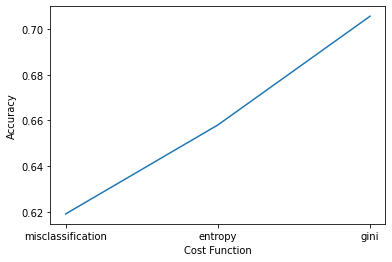

In [ ]:
#performance with different cost function
def switch(num):
    if num==1:
        return misclassification
    if num==2:
        return entropy
    if num==3:
        return gini

ccf=[]
for i in range (1,4): #max_depth !=0
    accuracy = eva_acc(8,switch(i),x_trainU, y_trainU,x_test,y_test)[0]
    ccf.append(accuracy)
print("The best performance cost function is "+switch(np.argmax(ccf)+1).__name__+" has accuracy= "+str(np.max(ccf)))
xlab=["misclassification",'entropy','gini']
plt.plot(xlab,ccf)
plt.ylabel("Accuracy")
plt.xlabel("Cost Function")
plt.show()


Test with different max_depth

Best accuracy is 0.7056277056277056 at max depth= 8


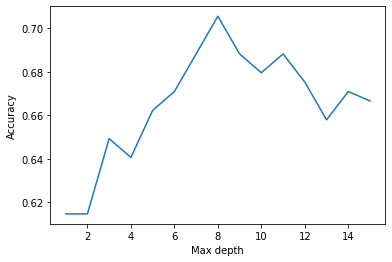

In [ ]:
acc=[]
x_axis=[]
for i in range (1,16): #max_depth !=0
    accuracy = eva_acc(i,switch(np.argmax(ccf)+1),x_trainU, y_trainU,x_test,y_test)[0]
    acc.append(accuracy) 
    x_axis.append(i)
print("Best accuracy is "+str(np.max(acc))+" at max depth= "+str(np.argmax(acc)+1))
plt.plot(x_axis,acc)
plt.ylabel("Accuracy")
plt.xlabel("Max depth")
plt.show()

**Misclassified plot** (with best parameter & cost function)

(690, 8)


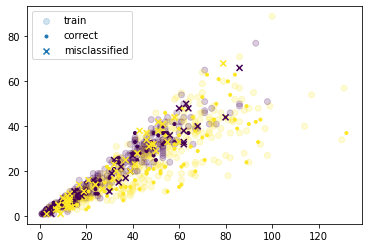

In [ ]:
#plot 
y_pred=eva_acc(8,gini,x_trainU, y_trainU,x_test,y_test)[1]
print(x_trainU.shape)
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_trainU[:,1], x_trainU[:,4], c=y_trainU, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,1], x_test[correct,4], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,1], x_test[incorrect,4], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

accuracy = 0.7056277056277056
precision = 0.7722772277227723
recall = 0.6341463414634146
[[ 78  23 101]
 [ 45  85 130]
 [123 108   0]]


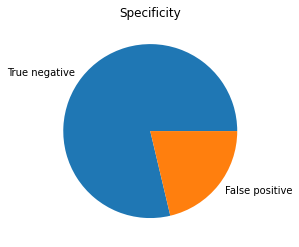

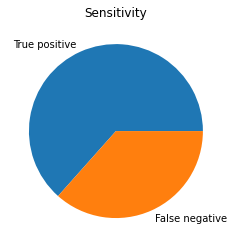

In [ ]:
#pie chart
y_pred=eva_acc(8,gini,x_trainU, y_trainU,x_test,y_test)[1]
tp=0
fp=0
tn=0
fn=0
for i in range(len(y_pred)):
  if y_pred[i]==1:
    if y_test[i]==y_pred[i]:
      tp=tp+1
    elif y_test[i]!=y_pred[i]:
      fp=fp+1
  elif y_pred[i]==0:
    if y_test[i]==y_pred[i]:
      tn=tn+1
    elif y_test[i]!=y_pred[i]:
      fn=fn+1
con_max=[[tp,fp,tp+fp],[fn,tn,fn+tn],[tp+fn,fp+tn,0]]
print("accuracy = "+str((tp+tn)/len(y_pred)))
print("precision = "+str((tp)/(tp+fp)))
print("recall = "+str((tp)/(tp+fn)))
print(np.array(con_max))
#plot of precision
plt.pie([tn,fp],labels=["True negative","False positive"])
plt.title('Specificity')
plt.show()
#plot of sensitivity 
plt.pie([tp,fn],labels=["True positive","False negative"])
plt.title('Sensitivity')
plt.show()

Decision Boundary plot

Text(0.5, 0, 'a_0.5')

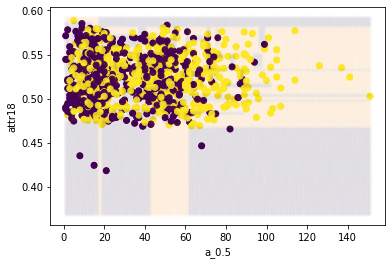

In [ ]:
##Select feature!!!(attr5, attr6)
x,y = getData(m_raw_df,["Image quality","Pre-screening","a_0.6","a_0.7","a_0.8","a_0.9","a_1.0","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","attr17","attr18"])
x_train, x_test, y_train,y_test=getSplitDataXY(m_raw_df,False, 1024,["Image quality","Pre-screening","a_0.6","a_0.7","a_0.8","a_0.9","a_1.0","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","attr17","attr18"], False, 0.8, 0.2,True)
(num_instances, num_features), num_classes = x.shape, np.max(y)+1
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
model = Decision_Tree(max_depth=200)
y_prob_all = model.fit(x_train, y_train).predict(x_all)
y_pred = np.argmax(y_prob_all,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred, marker='.', alpha=.01)
plt.ylabel('attr18')
plt.xlabel('a_0.5')

Dealing with noisy features 

##Training and Test on HEPATITIS DATA

In [ ]:
#Data Implementation
x_train ,  x_test , y_train, y_test = getSplitDataXY(h_raw_df, True, 1024,h_nfeatures, False ,0.85, 0.15, True ) #acc down with validation: 85+15 give the best 


**Tuning Parameter using validation set**

In [ ]:
x_minD,x_min,x_trainU,y_trainU,x_valU,y_valU=tuning_parameter(x_train,y_train,11,5)#max_depth>=2, fold>=2
print("Pick max_depth=" + str(x_minD)+" Validation Error="+str(x_min))
print(eva_acc(x_minD,gini,x_trainU, y_trainU,x_valU,y_valU)[0])
#plot for the k-th training set which gives the lowest validation error
#x_axis=[]
#accp=[]
#for j in range(1,11):
#  errp=1-eva_acc(j,gini,x_trainU, y_trainU,x_valU,y_valU)[0]
#  x_axis.append(j)
#  accp.append(errp)
#plt.plot(x_axis,accp)
#plt.ylabel("Validation Error")
#plt.xlabel("Max depth")
#plt.show()

Pick max_depth=6 Validation Error=0.21052631578947367
0.7894736842105263


Test with different cost functions

The best performance cost function is entropy has accuracy= 0.9444444444444444


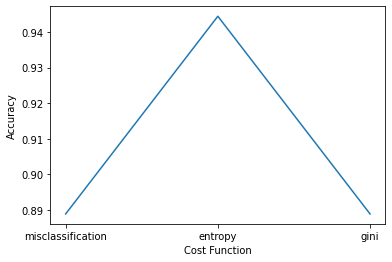

In [ ]:
#performance with different cost function
def switch(num):
    if num==1:
        return misclassification
    if num==2:
        return entropy
    if num==3:
        return gini

ccf=[]
for i in range (1,4): #max_depth !=0
    accuracy = eva_acc(2,switch(i),x_trainU, y_trainU,x_test,y_test)[0]
    ccf.append(accuracy)
print("The best performance cost function is "+switch(np.argmax(ccf)+1).__name__+" has accuracy= "+str(np.max(ccf)))
xlab=["misclassification",'entropy','gini']
plt.plot(xlab,ccf)
plt.ylabel("Accuracy")
plt.xlabel("Cost Function")
plt.show()

Test with different max-depth

Best accuracy is 0.9444444444444444 at max depth= 2


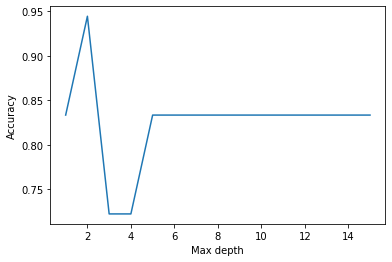

In [ ]:
acc=[]
x_axis=[]
for i in range (1,16): #max_depth !=0
    accuracy = eva_acc(i,entropy,x_trainU, y_trainU,x_test,y_test)[0]
    acc.append(accuracy) 
    x_axis.append(i)
print("Best accuracy is "+str(np.max(acc))+" at max depth= "+str(np.argmax(acc)+1))
plt.plot(x_axis,acc)
plt.ylabel("Accuracy")
plt.xlabel("Max depth")
plt.show()

Misclassification Plot

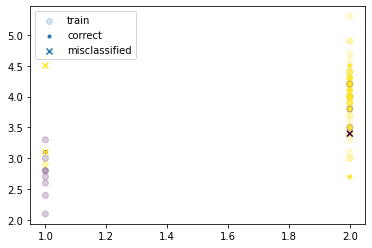

In [ ]:
y_pred=eva_acc(1,misclassification,x_trainU, y_trainU,x_test,y_test)[1]
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_trainU[:,7], x_trainU[:,11], c=y_trainU, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,7], x_test[correct,11], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,7], x_test[incorrect,11], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

Pie Chart

accuracy = 0.9444444444444444
precision = 0.9411764705882353
recall = 1.0
[[16  1 17]
 [ 0  1  1]
 [16  2  0]]


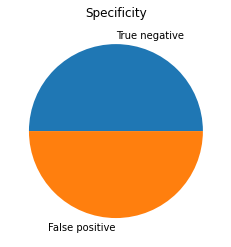

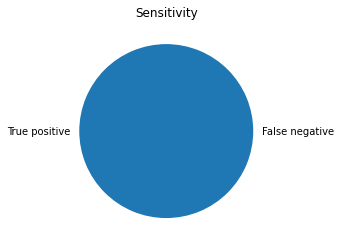

In [ ]:
#pie chart
y_pred=eva_acc(2,entropy,x_trainU, y_trainU,x_test,y_test)[1]
tp=0
fp=0
tn=0
fn=0
for i in range(len(y_pred)):
  if y_pred[i]==1:
    if y_test[i]==y_pred[i]:
      tp=tp+1
    elif y_test[i]!=y_pred[i]:
      fp=fp+1
  elif y_pred[i]==0:
    if y_test[i]==y_pred[i]:
      tn=tn+1
    elif y_test[i]!=y_pred[i]:
      fn=fn+1
con_max=[[tp,fp,tp+fp],[fn,tn,fn+tn],[tp+fn,fp+tn,0]]
print("accuracy = "+str((tp+tn)/len(y_pred)))
print("precision = "+str((tp)/(tp+fp)))
print("recall = "+str((tp)/(tp+fn)))
print(np.array(con_max))
#plot of precision
plt.pie([tn,fp],labels=["True negative","False positive"])
plt.title('Specificity')
plt.show()
#plot of sensitivity 
plt.pie([tp,fn],labels=["True positive","False negative"])
plt.title('Sensitivity')
plt.show()

Decision Boundary Polt


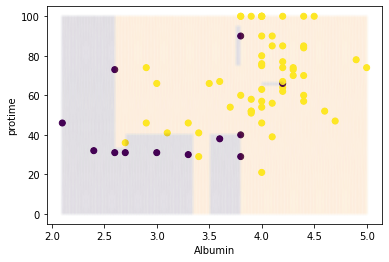

In [ ]:
##Select feature!!!
x,y = getData(h_raw_df,['Ascites',"Bilirubin","Sex","Age","Steroid","Antivirals","Fatigue","Malaise","anorexia","Live Big","Liver Firm","Spleen Palpable","Spiders","Varices","Alk Phosphate","Sgot","Histology"] )
#x, y = convert_df_np(X_data, Y_data)
x_train, x_test, y_train,y_test=getSplitDataXY(h_raw_df, True,1024,['Ascites',"Bilirubin","Sex","Age","Steroid","Antivirals","Fatigue","Malaise","anorexia","Live Big","Liver Firm","Spleen Palpable","Spiders","Varices","Alk Phosphate","Sgot","Histology"], False, 0.8, 0.2,True)
(num_instances, num_features), num_classes = x.shape, np.max(y)+1
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = Decision_Tree(max_depth=200)
y_prob_all = model.fit(x_train, y_train).predict(x_all)
y_pred = np.argmax(y_prob_all,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred, marker='.', alpha=.01)
plt.xlabel('Albumin')
plt.ylabel('protime')
plt.show()